## 1. Постановка задачи

Данный датасет содержит ежедневные записи о посещаемости тренажерного зала, а также подробную информацию об их тренировках. Он включает в себя такие сведения, как даты посещений, виды выполняемых упражнений, продолжительность тренировок и связанные с фитнесом действия, зарегистрированные во время каждого посещения. Данные отражают обычное поведение посетителей тренажерного зала на индивидуальном уровне в течение определенного периода времени.

### Условный заказчик
Бизнес-менеджмент фитнес-клуба или команда продукта

### Возможные задачи ИАД
#### Сегментация клиентов
- Выявление устойчивых групп посетителей на основе паттернов поведения: регулярности посещений, предпочитаемых видов тренировок, времени прихода, сжигаемых калорий и др.

#### Поиск аномалий и анализ причин пропусков
- Обнаружение нестандартных случаев в данных: отрицательные значения калорий, крайне низкая/высокая продолжительность тренировок при значительном расходе калорий и др.

#### Описательная аналитика и поиск закономерностей
- Профилирование групп по типам членства, возрасту и полу.


## 2. Паспорт датасета

In [154]:
%pip install pandas
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: C:\Users\User\PycharmProjects\PythonProject\dataset_analys_1\.venv\Scripts\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: C:\Users\User\PycharmProjects\PythonProject\dataset_analys_1\.venv\Scripts\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: C:\Users\User\PycharmProjects\PythonProject\dataset_analys_1\.venv\Scripts\python.exe -m pip install --upgrade pip


In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('../data/gym_statistic_ds.csv', sep=';')
print(f"Количество строк: {df.shape[0]}\nКоличество столбцов: {df.shape[1]}\n")

columns_name = [col for col in df]
columns_descriptions = ['Уникальный идентификатор члена фитнес-клуба', 'Дата посещения', 'Возраст посетителя в годах',
                        'Пол посетителя', 'Тип членства', 'Тип тренировки', 'Длительность тренировки в минутах',
                        'Количество сожжённых калорий', 'Время регистрации входа', 'Статус посещения']
columns_dtype_pd = [str(df[col].dtype) for col in df]

print('Cписок всех признаков, их текущих типов и описаний:')
for i in range(len(columns_name)):
    print(f"{columns_name[i]:<30} {columns_dtype_pd[i]:<10} - {columns_descriptions[i]}")

df['visit_date'] = pd.to_datetime(df['visit_date'], format='%d.%m.%Y')
df['gender'] = df['gender'].astype('category')
df['membership_type'] = df['membership_type'].astype('category')
df['workout_type'] = df['workout_type'].astype('category')
df['check_in_time'] = pd.to_datetime(df['check_in_time'], format='%H:%M:%S').dt.time
df['attendance_status'] = df['attendance_status'].astype('category')
print(f'\nИтоговые преобразованные типы данных:\n{df.dtypes}')



Количество строк: 2600
Количество столбцов: 10

Cписок всех признаков, их текущих типов и описаний:
member_id                      int64      - Уникальный идентификатор члена фитнес-клуба
visit_date                     str        - Дата посещения
age                            int64      - Возраст посетителя в годах
gender                         str        - Пол посетителя
membership_type                str        - Тип членства
workout_type                   str        - Тип тренировки
workout_duration_minutes       int64      - Длительность тренировки в минутах
calories_burned                int64      - Количество сожжённых калорий
check_in_time                  str        - Время регистрации входа
attendance_status              str        - Статус посещения

Итоговые преобразованные типы данных:
member_id                            int64
visit_date                  datetime64[us]
age                                  int64
gender                            category
membership_type 

## 3. Аудит качества данных

3.1 Пропуски
                          Количество пропусков  Доля пропусков, %
member_id                                    0               0.00
visit_date                                   0               0.00
age                                          0               0.00
gender                                     863              33.19
membership_type                              0               0.00
workout_type                                 0               0.00
workout_duration_minutes                     0               0.00
calories_burned                              0               0.00
check_in_time                                0               0.00
attendance_status                            0               0.00
Вывод по пропускам: Единсвенным признаком с пропусками является пол (около 33%), что проблемно для анализа, но не является критичным, так как распределение по полу можно примерно восстановить, опираясь на известные данные

3.2 Дубликаты
Полностью дублирующихся 

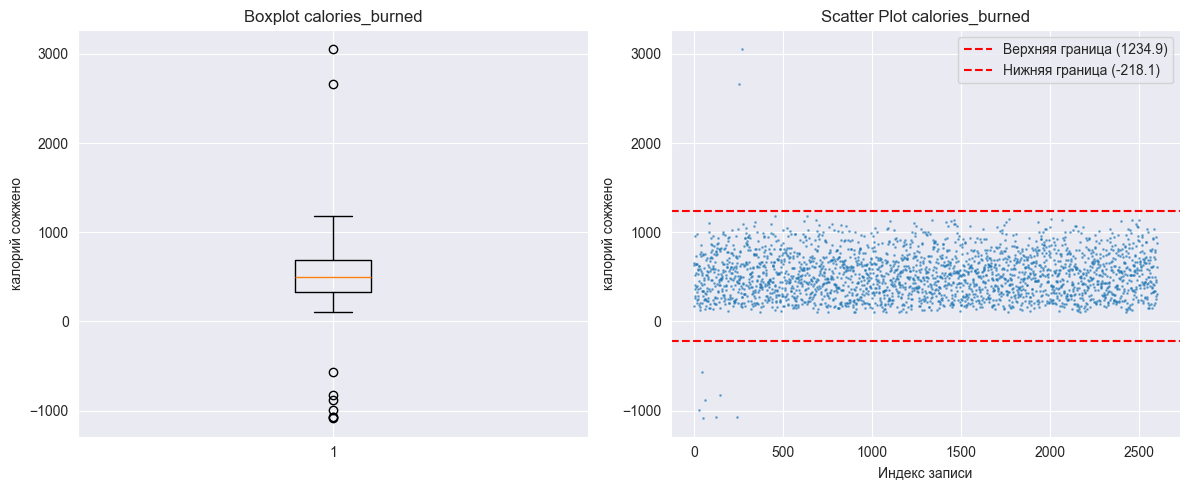

In [156]:
print("3.1 Пропуски")
miss_data = pd.DataFrame({
    'Количество пропусков': df.isnull().sum(),
    'Доля пропусков, %': round((df.isnull().sum() / len(df) * 100), 2)
})
print(miss_data)
print(f'Вывод по пропускам: Единсвенным признаком с пропусками является пол (около 33%), что проблемно для анализа, '
      f'но не является критичным, так как распределение по полу можно примерно восстановить, опираясь на известные данные')

print("\n3.2 Дубликаты")
print(f"Полностью дублирующихся строк: {df.duplicated().sum()}")
duplicates_without_id = df.duplicated(
    subset=['visit_date', 'age', 'gender', 'membership_type', 'workout_type', 'workout_duration_minutes',
            'calories_burned', 'check_in_time', 'attendance_status'])
print(f"Количество дублидующихся строк без явного идентификатора: {duplicates_without_id.sum()}\n")



print("3.3 Типические проблемы значений")
print("Числовые признаки:")
int_cols = ['age', 'workout_duration_minutes', 'calories_burned']
for col in int_cols:
    print(f"\n{col}:")
    print(f"Min: {round(df[col].min(), 2)}, Max: {round(df[col].max(), 2)}")
    print(f"Mean: {round(df[col].mean(), 2)}, Std: {round(df[col].std(), 2)}")
    print(f"Медиана: {round(df[col].median(), 2)}")
    if col == 'workout_duration_minutes':
        print(f"Количество занятий с нулевым временем тренировки: {(df[col] == 0).sum()}")
    elif col == 'calories_burned':
        print(f"Количество занятий с отрицательной потерей калорий: {(df[col] < 0).sum()}")
        print(f"Количество занятий с огромной потерей калорий: {(df[col] > 1500).sum()}")

print("\nКатегориальные признаки:")
category_cols = ['gender', 'membership_type', 'workout_type', 'attendance_status']
for col in category_cols:
    print(f"Количество уникальных значений {col}: {df[col].nunique()}")

print("\n3.4 Выбросы")
print(f"Анализ выбросов для calories_burned:")
Q1 = df['calories_burned'].quantile(0.25)
Q3 = df['calories_burned'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['calories_burned'] < lower_bound) | (df['calories_burned'] > upper_bound)]
print(f"Метод IQR (границы: [{round(lower_bound, 2)}, {round(upper_bound, 1)}]):")
print(f"Выбросов: {len(outliers_iqr)} ({round(len(outliers_iqr) / len(df) * 100, 2)}%)")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].boxplot(df['calories_burned'].dropna())
axes[0].set_title(f'Boxplot calories_burned')
axes[0].set_ylabel('калорий сожжено')

axes[1].scatter(range(len(df)), df['calories_burned'], alpha=0.5, s=1)
axes[1].axhline(y=upper_bound, color='r', linestyle='--', label=f'Верхняя граница ({round(upper_bound, 1)})')
axes[1].axhline(y=lower_bound, color='r', linestyle='--', label=f'Нижняя граница ({round(lower_bound, 1)})')
axes[1].set_title(f'Scatter Plot calories_burned')
axes[1].set_xlabel('Индекс записи')
axes[1].set_ylabel('калорий сожжено')
axes[1].legend()
plt.tight_layout()
plt.show()



## 4. Мини-EDA (разведочный анализ)

Мини-EDA



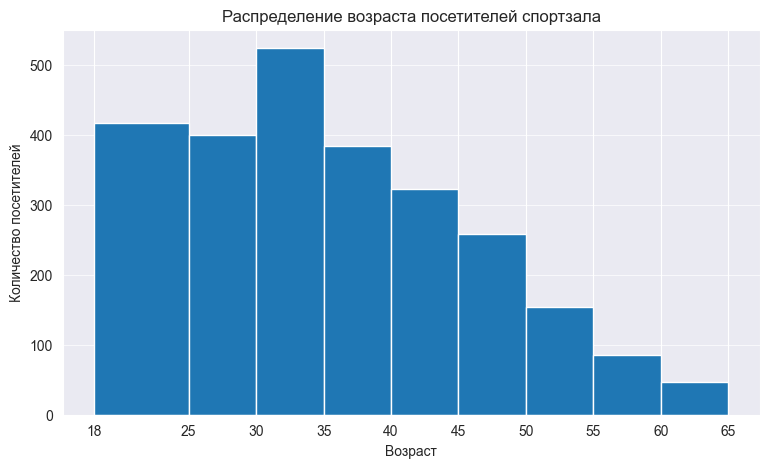

На гистограмме видно распределение посетителей спортзала по возрастным группам. Основной контингент — это молодые люди в возрасте 25–35 лет, после 40 лет число посетителей заметно снижается
Гипотеза: Можно предположить, что спортзал наиболее популярен среди молодёжи и людей среднего возраста, возможно, из-за активного образа жизни, доступности абонементов или расположения зала.
Вопрос: Какие программы могли бы привлечь старшую возрастную группу?




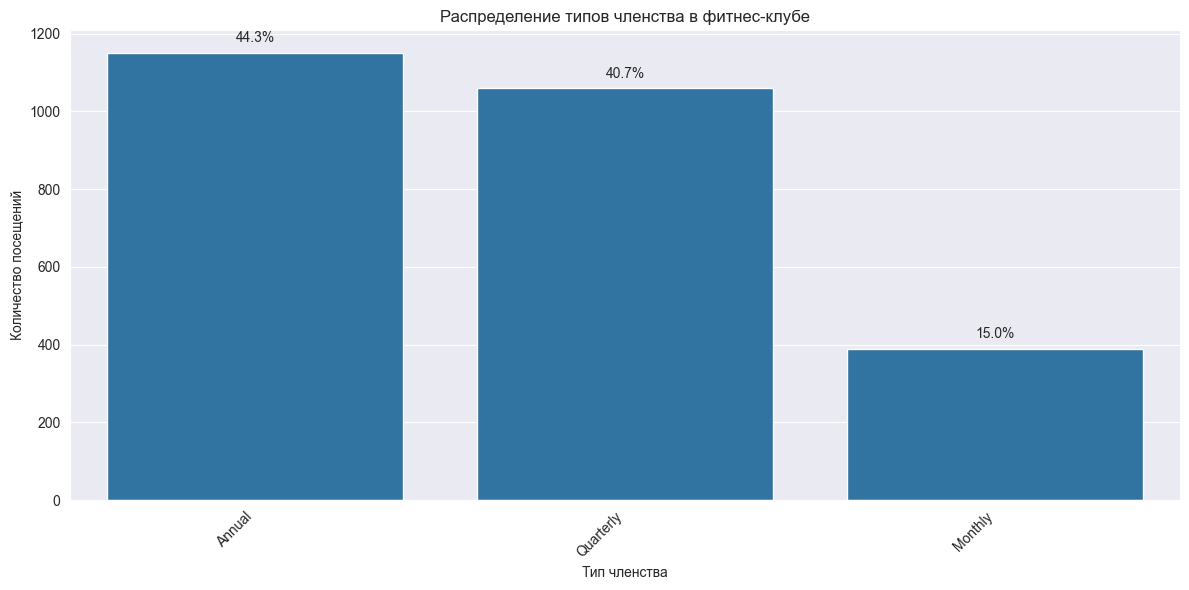


На диаграмме видно, что преобладают долгосрочные типы членства: годовой (44.3%) и квартальный (40.7%), в то время как ежемесячная подписка составляет меньшинство — ровно 15%.
Можно предположить, что клуб успешно мотивирует клиентов к долгосрочным обязательствам за счёт выгодной цены или программ лояльности.
Как еще можно повысить конверсию с месячного на долгосрочные форматы?




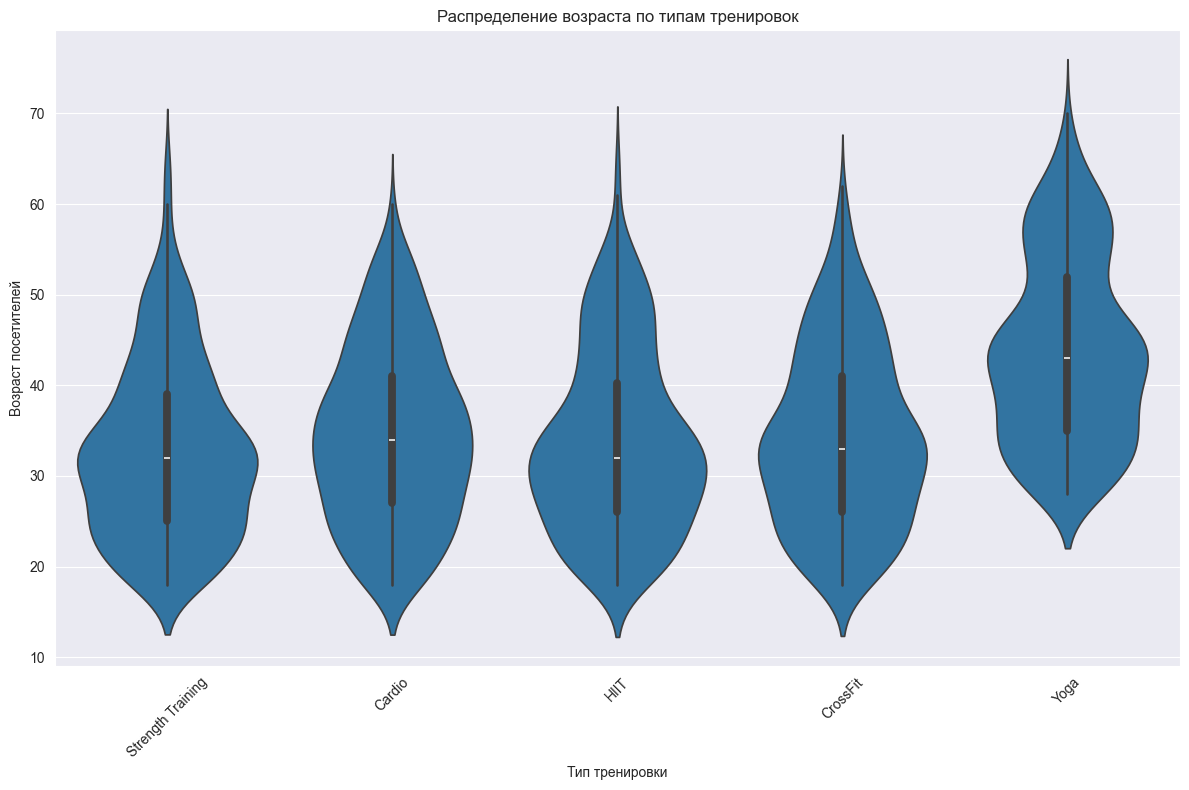

Видно, что для большинства типов тренировок возраст распределён примерно нормально, с пиком около 30 лет. Особо выделяется йога, у которой распределение сдвинуто в сторону старшего возраста.
Гипотеза: Йога привлекает более взрослую аудиторию, возможно, из-за меньшей интенсивности и направленности на восстановление и гибкость.
Вопрос: Связано ли это с возрастом, маркетингом, содержанием тренировок или культурными предпочтениями?




In [150]:
print("Мини-EDA\n")

plt.figure(figsize=(9, 5))
plt.hist(df['age'], bins=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
plt.xlabel('Возраст')
plt.ylabel('Количество посетителей')
plt.title('Распределение возраста посетителей спортзала')
plt.xticks([18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
plt.grid(axis='y', alpha=0.7)
plt.show()
print(
"""На гистограмме видно распределение посетителей спортзала по возрастным группам. Основной контингент — это молодые люди в возрасте 25–35 лет, после 40 лет число посетителей заметно снижается
Гипотеза: Можно предположить, что спортзал наиболее популярен среди молодёжи и людей среднего возраста, возможно, из-за активного образа жизни, доступности абонементов или расположения зала.
Вопрос: Какие программы могли бы привлечь старшую возрастную группу?\n
""")


plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='membership_type', order=df['membership_type'].value_counts().index)
plt.title('Распределение типов членства в фитнес-клубе')
plt.xlabel('Тип членства')
plt.ylabel('Количество посещений')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 20,
            f'{round(p.get_height() / len(df) * 100, 1)}%', ha="center", va="bottom", fontsize=10)
plt.tight_layout()
plt.show()
print("""
На диаграмме видно, что преобладают долгосрочные типы членства: годовой (44.3%) и квартальный (40.7%), в то время как ежемесячная подписка составляет меньшинство — ровно 15%.
Можно предположить, что клуб успешно мотивирует клиентов к долгосрочным обязательствам за счёт выгодной цены или программ лояльности.
Как еще можно повысить конверсию с месячного на долгосрочные форматы?\n
""")


plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='workout_type', y='age', order=df['workout_type'].value_counts().index)
plt.title('Распределение возраста по типам тренировок')
plt.xlabel('Тип тренировки')
plt.ylabel('Возраст посетителей')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("""Видно, что для большинства типов тренировок возраст распределён примерно нормально, с пиком около 30 лет. Особо выделяется йога, у которой распределение сдвинуто в сторону старшего возраста.
Гипотеза: Йога привлекает более взрослую аудиторию, возможно, из-за меньшей интенсивности и направленности на восстановление и гибкость.
Вопрос: Связано ли это с возрастом, маркетингом, содержанием тренировок или культурными предпочтениями?\n
""")



